Image source: http://image.ntua.gr/iva/datasets/flickr_logos/

# Explore

In [28]:
from os import listdir
import os
import pandas as pd
import requests
import shutil 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['text.color'] = 'black'

In [2]:
folder_dir = 'flickr_logos_27_dataset'
photos_loc = 'flickr_logos_27_dataset_images'
photos_dir = os.path.join(folder_dir, photos_loc)
photos = listdir(photos_dir)
files = listdir(folder_dir)

In [3]:
distractor_url = pd.read_csv(os.path.join(folder_dir,files[0]), header=None, names=['url'])
query_annotation = pd.read_csv(os.path.join(folder_dir, files[2]), sep="\t", names=['file', 'label'])          
training_annotation = pd.read_csv(os.path.join(folder_dir,files[3]), sep=' ', header=None, index_col=False)        
training_annotation.drop(7, axis=1, inplace=True)
training_annotation.columns =  ['file', 'label', 'Sub', 'X1', 'Y1', 'X2', 'Y2']   

In [4]:
training_annotation[training_annotation.file.isin(photos)] #all photos has annotation

,file,label,Sub,X1,Y1,X2,Y2
0,144503924.jpg,Adidas,1,38,12,234,142
1,2451569770.jpg,Adidas,1,242,208,413,331
2,390321909.jpg,Adidas,1,13,5,89,60
3,4761260517.jpg,Adidas,1,43,122,358,354
4,4763210295.jpg,Adidas,1,83,63,130,93
...,...,...,...,...,...,...,...
4531,2126991906.jpg,Yahoo,6,15,6,253,54
4532,217288720.jpg,Yahoo,6,136,161,304,222
4533,2472817996.jpg,Yahoo,6,2,4,499,106
4534,2514220918.jpg,Yahoo,6,1,69,342,157


In [5]:
len(photos), len(query_annotation), len(training_annotation), len(distractor_url),
#1k zdjęć, 270 opisów, 4500 wskazań ramek, 4200 rozpraszaczy.

(1079, 270, 4536, 4207)

In [6]:
training_annotation.label.unique(), len(training_annotation.label.unique())

(array(['Adidas', 'Apple', 'BMW', 'Citroen', 'Cocacola', 'DHL', 'Fedex',
        'Ferrari', 'Ford', 'Google', 'Heineken', 'HP', 'Intel',
        'McDonalds', 'Mini', 'Nbc', 'Nike', 'Pepsi', 'Porsche', 'Puma',
        'RedBull', 'Sprite', 'Starbucks', 'Texaco', 'Unicef', 'Vodafone',
        'Yahoo'], dtype=object), 27)

In [7]:
training_annotation[training_annotation.file=='1224626332.jpg']

,file,label,Sub,X1,Y1,X2,Y2
1410,1224626332.jpg,Ferrari,5,64,74,293,385
1440,1224626332.jpg,Ferrari,6,64,74,293,385


# Download distractors

In [8]:
new_dir = 'distractors_photos'
try:
    os.mkdir(new_dir)
except:
    print("Already exists")

Already exists


In [9]:
for row in distractor_url.itertuples(index=False):
    image_url = row.url
    r = requests.get(image_url, stream = True)
    filename = os.path.join(new_dir, image_url.split("/")[-1])
    if r.status_code == 200:
        r.raw.decode_content = True
        with open(filename,'wb') as f:
            shutil.copyfileobj(r.raw, f)  
#         print('Image sucessfully Downloaded: ', image_url.split("/")[-1])
    else:
        print('Image Couldn\'t be retreived', image_url)

Image Couldn't be retreived http://farm2.static.flickr.com/1108/1047095104_503998550b.jpg
Image Couldn't be retreived http://farm2.static.flickr.com/1359/1076885577_01ee16bf04.jpg
Image Couldn't be retreived http://farm2.static.flickr.com/1363/1277773985_50808f6ba0.jpg
Image Couldn't be retreived http://farm2.static.flickr.com/1326/1357097399_11941a51d3.jpg
Image Couldn't be retreived http://farm2.static.flickr.com/1053/1357097685_b6f5b92d7d.jpg
Image Couldn't be retreived http://farm2.static.flickr.com/1066/1423871758_6c72adedaa.jpg
Image Couldn't be retreived http://farm2.static.flickr.com/1198/1423875908_f39732a383.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2274/1570759317_a6422a1ab3.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2409/1743560452_6ddb86d454.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2264/1776720811_727beb3ad8.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2311/1800394862_96a58645f1.jpg
Image Coul

Image Couldn't be retreived http://farm4.static.flickr.com/3230/2667904518_19200ea39d.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3285/2673728004_f761421877.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3064/2677958710_bb34250c13.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3021/2680538258_ce6b22c010.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3096/2688229773_d811b8a4b3.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3032/2688282229_07f5d6bc95.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3290/2699634065_5eedc3b026.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2083/2701321727_9c35a05117.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3002/2731797738_45595e3eaf.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2105/2733512621_6ee7021f11.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3211/2734749763_5d5f851fe0.jpg
Image Coul

Image Couldn't be retreived http://farm4.static.flickr.com/3109/3195148123_12eee29d55.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3396/3195996592_f73ac067f1.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3427/3197141159_93e93ee8c1.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3344/3198420487_417a839641.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3478/3198420491_c6f8a4ffe1.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3081/3209290407_2070a1a073.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3535/3210020803_03540fa77d.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3080/3210866194_19f07c6473.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3076/3218028745_250695dc92.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3534/3219799503_a2e50caf3b.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3323/3219799557_b63bc7c44d.jpg
Image Coul

Image Couldn't be retreived http://farm3.static.flickr.com/2438/3553955761_666f289c79.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3664/3559686470_3b48b64cbe.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3608/3567661398_f283d83dc2.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2459/3567661808_ee553fdc86.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2103/3570594692_9cfdfe88fd.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3336/3573631416_f0c5049ef3.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3302/3575152875_c5e95dfe66.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3662/3610581540_da33b333f4.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3344/3615866833_4bb99360d0.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3386/3618558509_5fc4546aa4.jpg
Image Couldn't be retreived http://farm4.static.flickr.com/3628/3620362776_15616b7b9a.jpg
Image Coul

Image Couldn't be retreived http://farm3.static.flickr.com/2764/4078488187_c6526e8e7b.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2543/4078511905_f4b202c062.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2553/4080328551_399dc37ea0.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2569/4087731962_53061a0b9f.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2422/4090048030_1d35799b50.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2592/4092491282_6e9418db44.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2458/4092554351_b2e94e5985.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2771/4100674963_2136c32cc3.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2512/4100858174_55270035b1.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2589/4105405789_78c4a13551.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2492/4111045667_6e626a4e11.jpg
Image Coul

Image Couldn't be retreived http://farm3.static.flickr.com/2725/4317955879_711acf8c68.jpg
Image Couldn't be retreived http://farm5.static.flickr.com/4057/4323958847_38c3a1fc6f.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2724/4325699673_cd4487a462.jpg
Image Couldn't be retreived http://farm5.static.flickr.com/4014/4326621214_4a00fff467.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2760/4327944721_f8b135de49.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2683/4327944983_04fbcee836.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2735/4328659137_92f2157fb1.jpg
Image Couldn't be retreived http://farm5.static.flickr.com/4050/4328678002_dafeb6e84d.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2758/4328869736_813e7d147f.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2783/4328935279_8eba44f16c.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2762/4329379158_0a5203219c.jpg
Image Coul

Image Couldn't be retreived http://farm5.static.flickr.com/4021/4533385615_1ca1bb769e.jpg
Image Couldn't be retreived http://farm5.static.flickr.com/4059/4533661518_da93d9ab6e.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2681/4534722991_3b3251f7a2.jpg
Image Couldn't be retreived http://farm5.static.flickr.com/4027/4538232978_7ff91effac.jpg
Image Couldn't be retreived http://farm5.static.flickr.com/4012/4538233220_835f113df5.jpg
Image Couldn't be retreived http://farm5.static.flickr.com/4029/4539020301_6aab378b65.jpg
Image Couldn't be retreived http://farm5.static.flickr.com/4028/4540508712_96449bccc7.jpg
Image Couldn't be retreived http://farm5.static.flickr.com/4032/4541223408_c92e4bbd02.jpg
Image Couldn't be retreived http://farm3.static.flickr.com/2747/4541510113_d152c1951e.jpg
Image Couldn't be retreived http://farm5.static.flickr.com/4017/4542990853_8ea57eabb2.jpg
Image Couldn't be retreived http://farm5.static.flickr.com/4026/4543031950_342f8ca399.jpg
Image Coul

Image Couldn't be retreived http://farm5.static.flickr.com/4068/4695840241_f771a0d8d4.jpg
Image Couldn't be retreived http://farm5.static.flickr.com/4015/4697478685_7130305ce1.jpg
Image Couldn't be retreived http://farm5.static.flickr.com/4003/4698572723_2e8a6b4cf0.jpg
Image Couldn't be retreived http://farm5.static.flickr.com/4002/4699954949_cc87a9c3ac.jpg
Image Couldn't be retreived http://farm2.static.flickr.com/1275/4701009517_d9c0151899.jpg
Image Couldn't be retreived http://farm5.static.flickr.com/4005/4703196981_4e090b21fd.jpg
Image Couldn't be retreived http://farm5.static.flickr.com/4012/4703197049_d3f2bffc11.jpg
Image Couldn't be retreived http://farm5.static.flickr.com/4066/4705546134_92477724e6.jpg
Image Couldn't be retreived http://farm2.static.flickr.com/1308/4705966699_d019606ec4.jpg
Image Couldn't be retreived http://farm5.static.flickr.com/4034/4709615230_d8bbcf0bac.jpg
Image Couldn't be retreived http://farm5.static.flickr.com/4058/4711733024_a1b5812a86.jpg
Image Coul

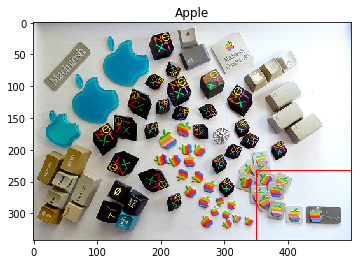

In [39]:
def show_photo_with_box(nr_photo):
    photo_name = training_annotation.loc[nr_photo]['file']
    im = np.array(Image.open(os.path.join(photos_dir, photo_name)), dtype=np.uint8)
    fig,ax = plt.subplots(1)
    ax.imshow(im)
    x1, y1, x2, y2 = training_annotation.loc[nr_photo][['X1', 'Y1', 'X2', 'Y2']].values
    rect = patches.Rectangle((x1,y1), x2,y2, linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    title = training_annotation.loc[nr_photo]['label']
    title_obj = plt.title(title)
    plt.show()

show_photo_with_box(40)